In [1]:
# NOTES:
# 2.Feature Selection: Research other features that can be added to the dataframe
# 3.Remove columns that have total counts instead of percentages (i.e FGP vs FGM or FGA) if not valid
# 4.Look at correlation of all columns (especially after creating new ones from research)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

# to ignore the warnings
from warnings import filterwarnings

In [2]:
game_statistics_df = pd.read_csv('./data/gameStatistics.csv')
game_statistics_df.head()

,visitor_fastBreakPoints,visitor_pointsInPaint,visitor_biggestLead,visitor_secondChancePoints,visitor_pointsOffTurnovers,visitor_longestRun,visitor_points,visitor_fgm,visitor_fga,visitor_fgp,...,home_defReb,home_totReb,home_assists,home_pFouls,home_steals,home_turnovers,home_blocks,home_plusMinus,home_min,home_team
0,12.0,82.0,17.0,24.0,16.0,13.0,142.0,53.0,105.0,50.5,...,28.0,43.0,29.0,33.0,7.0,11.0,9.0,6.0,290:00,Houston Rockets
1,7.0,38.0,33.0,4.0,16.0,11.0,114.0,41.0,76.0,53.9,...,30.0,42.0,20.0,21.0,6.0,16.0,2.0,-18.0,240:00,Sacramento Kings
2,13.0,32.0,14.0,22.0,25.0,12.0,98.0,36.0,93.0,38.7,...,36.0,42.0,24.0,21.0,9.0,16.0,5.0,8.0,240:00,LA Clippers
3,0.0,46.0,6.0,16.0,8.0,9.0,116.0,46.0,89.0,51.7,...,34.0,45.0,18.0,20.0,4.0,11.0,4.0,-3.0,240:00,Oklahoma City Thunder
4,16.0,42.0,18.0,17.0,18.0,14.0,123.0,43.0,77.0,55.8,...,23.0,35.0,18.0,29.0,9.0,16.0,4.0,-13.0,240:00,Phoenix Suns


In [3]:
game_statistics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9512 entries, 0 to 9511
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   visitor_fastBreakPoints     6191 non-null   float64
 1   visitor_pointsInPaint       6191 non-null   float64
 2   visitor_biggestLead         6191 non-null   float64
 3   visitor_secondChancePoints  6191 non-null   float64
 4   visitor_pointsOffTurnovers  6191 non-null   float64
 5   visitor_longestRun          6191 non-null   float64
 6   visitor_points              9510 non-null   float64
 7   visitor_fgm                 9510 non-null   float64
 8   visitor_fga                 9510 non-null   float64
 9   visitor_fgp                 9510 non-null   float64
 10  visitor_ftm                 9510 non-null   float64
 11  visitor_fta                 9510 non-null   float64
 12  visitor_ftp                 9510 non-null   float64
 13  visitor_tpm                 9510 

In [4]:
# Convert values in percentage columns to decimal form
game_statistics_df[['visitor_ftp', 'visitor_fgp', 'visitor_tpp', 'home_ftp', 'home_fgp','home_tpp']] = game_statistics_df[
    ['visitor_ftp', 
     'visitor_fgp', 
     'visitor_tpp', 
     'home_ftp', 
     'home_fgp',
     'home_tpp']
    ].apply(lambda x: x / 100)

In [5]:
# Drop irrelevant columns
game_statistics_df = game_statistics_df.drop(columns=['visitor_fastBreakPoints', 'visitor_pointsInPaint',
       'visitor_biggestLead', 'visitor_secondChancePoints',
       'visitor_pointsOffTurnovers', 'visitor_longestRun','visitor_plusMinus',
       'visitor_min','home_fastBreakPoints',
       'home_pointsInPaint', 'home_biggestLead', 'home_secondChancePoints',
       'home_pointsOffTurnovers', 'home_longestRun','home_plusMinus', 'home_min','game_id'])

# Display
game_statistics_df.head()

,visitor_points,visitor_fgm,visitor_fga,visitor_fgp,visitor_ftm,visitor_fta,visitor_ftp,visitor_tpm,visitor_tpa,visitor_tpp,...,home_tpp,home_offReb,home_defReb,home_totReb,home_assists,home_pFouls,home_steals,home_turnovers,home_blocks,home_team
0,142.0,53.0,105.0,0.505,26.0,37.0,0.703,10.0,25.0,0.400,...,0.346,15.0,28.0,43.0,29.0,33.0,7.0,11.0,9.0,Houston Rockets
1,114.0,41.0,76.0,0.539,18.0,24.0,0.750,14.0,30.0,0.467,...,0.375,12.0,30.0,42.0,20.0,21.0,6.0,16.0,2.0,Sacramento Kings
2,98.0,36.0,93.0,0.387,15.0,19.0,0.789,11.0,33.0,0.333,...,0.357,6.0,36.0,42.0,24.0,21.0,9.0,16.0,5.0,LA Clippers
3,116.0,46.0,89.0,0.517,9.0,14.0,0.643,15.0,34.0,0.441,...,0.312,11.0,34.0,45.0,18.0,20.0,4.0,11.0,4.0,Oklahoma City Thunder
4,123.0,43.0,77.0,0.558,27.0,34.0,0.794,10.0,24.0,0.417,...,0.370,12.0,23.0,35.0,18.0,29.0,9.0,16.0,4.0,Phoenix Suns


In [6]:
game_statistics_df.isnull().sum()

visitor_points       2
visitor_fgm          2
visitor_fga          2
visitor_fgp          2
visitor_ftm          2
visitor_fta          2
visitor_ftp          2
visitor_tpm          2
visitor_tpa          2
visitor_tpp          2
visitor_offReb       2
visitor_defReb       2
visitor_totReb       2
visitor_assists      2
visitor_pFouls       2
visitor_steals       2
visitor_turnovers    2
visitor_blocks       2
visitor_team         0
home_points          2
home_fgm             2
home_fga             2
home_fgp             2
home_ftm             2
home_fta             2
home_ftp             2
home_tpm             2
home_tpa             2
home_tpp             2
home_offReb          2
home_defReb          2
home_totReb          2
home_assists         2
home_pFouls          2
home_steals          2
home_turnovers       2
home_blocks          2
home_team            0
dtype: int64

In [7]:
df = game_statistics_df.dropna()

# Feature Engineering

In [8]:
# Look at columns of data frame
df.columns

Index(['visitor_points', 'visitor_fgm', 'visitor_fga', 'visitor_fgp',
       'visitor_ftm', 'visitor_fta', 'visitor_ftp', 'visitor_tpm',
       'visitor_tpa', 'visitor_tpp', 'visitor_offReb', 'visitor_defReb',
       'visitor_totReb', 'visitor_assists', 'visitor_pFouls', 'visitor_steals',
       'visitor_turnovers', 'visitor_blocks', 'visitor_team', 'home_points',
       'home_fgm', 'home_fga', 'home_fgp', 'home_ftm', 'home_fta', 'home_ftp',
       'home_tpm', 'home_tpa', 'home_tpp', 'home_offReb', 'home_defReb',
       'home_totReb', 'home_assists', 'home_pFouls', 'home_steals',
       'home_turnovers', 'home_blocks', 'home_team'],
      dtype='object')

In [9]:
# Calculate Defensive Rebound Percentage
# High DRB%: Typically 78% or higher
# Average DRB%: Around 73% to 77%
# Low DRB%: 72% or lower
df['visitor_drb%'] = df['visitor_defReb'] / (df['visitor_defReb'] + df['home_offReb'])
df['home_drb%'] = df['home_defReb'] / (df['home_defReb'] + df['visitor_offReb'])

C:\Users\User\AppData\Local\Temp\ipykernel_26272\4243611011.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['visitor_drb%'] = df['visitor_defReb'] / (df['visitor_defReb'] + df['home_offReb'])
C:\Users\User\AppData\Local\Temp\ipykernel_26272\4243611011.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_drb%'] = df['home_defReb'] / (df['home_defReb'] + df['visitor_offReb'])


In [10]:
# Calculate Offensive Rebound Percentage
# High ORB%: 30% or higher
# Average ORB%: 20% and 27%
# Low ORB%: 19% or lower
df['visitor_orb%'] = df['visitor_offReb'] / (df['visitor_offReb'] + df['home_defReb'])
df['home_orb%'] = df['home_offReb'] / (df['home_offReb'] + df['visitor_defReb'])

C:\Users\User\AppData\Local\Temp\ipykernel_26272\112929147.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['visitor_orb%'] = df['visitor_offReb'] / (df['visitor_offReb'] + df['home_defReb'])
C:\Users\User\AppData\Local\Temp\ipykernel_26272\112929147.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_orb%'] = df['home_offReb'] / (df['home_offReb'] + df['visitor_defReb'])


In [11]:
# Calculate Free Throw Attempt Rate
# FTA Rate measures how often a team gets to the free-throw line relative to its field-goal attempts.
# An FTA Rate of around 0.2–0.3 is typical for NBA teams, but elite teams may exceed this range.
# It indicates how aggressive a team is in drawing fouls and earning free throws.
df['visitor_fta_rate'] = df['visitor_fta'] / df['visitor_fga']
df['home_fta_rate'] = df['home_fta'] / df['home_fga']

C:\Users\User\AppData\Local\Temp\ipykernel_26272\504875478.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['visitor_fta_rate'] = df['visitor_fta'] / df['visitor_fga']
C:\Users\User\AppData\Local\Temp\ipykernel_26272\504875478.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_fta_rate'] = df['home_fta'] / df['home_fga']


In [12]:
# Benchmarks for TO% in the NBA:
# Excellent: Less than 12%
# Teams that excel at ball control and avoid turnovers.
# Good: 12% to 14%
# Solid ball-handling and decision-making.
# Average: 14% to 16%
# Typical for most teams; manageable turnovers without being costly.
# Poor: Greater than 16%
# Indicates sloppy play or excessive risk-taking.

# Calculate number of possessions
df['visitor_possessions'] = (
    df['visitor_fga'] + 0.44  * df['visitor_fta'] - df['visitor_offReb'] + df['visitor_turnovers']
    )
df['home_possessions'] = (
    df['home_fga'] + 0.44  * df['home_fta'] - df['home_offReb'] + df['home_turnovers']
    )

# Calculate turn over percentage
df['visitor_to%'] = (df['visitor_turnovers'] / df['visitor_possessions'])
df['home_to%'] = (df['home_turnovers'] / df['home_possessions'])

C:\Users\User\AppData\Local\Temp\ipykernel_26272\3143746528.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['visitor_possessions'] = (
C:\Users\User\AppData\Local\Temp\ipykernel_26272\3143746528.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_possessions'] = (
C:\Users\User\AppData\Local\Temp\ipykernel_26272\3143746528.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [13]:
# Calculate Offensive Rating (ORtg)
df['visitor_ORtg'] = (df['visitor_points'] / df['visitor_possessions']) * 100
df['home_ORtg'] = (df['home_points'] / df['home_possessions']) * 100

# Calculate Defensive Rating (DRtg)
df['visitor_DRtg'] = (df['home_points'] / df['visitor_possessions']) * 100
df['home_DRtg'] = (df['visitor_points'] / df['home_possessions']) * 100


C:\Users\User\AppData\Local\Temp\ipykernel_26272\1931105852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['visitor_ORtg'] = (df['visitor_points'] / df['visitor_possessions']) * 100
C:\Users\User\AppData\Local\Temp\ipykernel_26272\1931105852.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_ORtg'] = (df['home_points'] / df['home_possessions']) * 100
C:\Users\User\AppData\Local\Temp\ipykernel_26272\1931105852.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [14]:
# Calculate Turn Over Ratio (TO)
# (TO * 100) / (FGA + (FTA * 0.44) + AST + TO)
df['visitor_turn_over_ratio'] = (df['visitor_turnovers'] * 100) / (df['visitor_fga'] + ((df['visitor_fta']) * 0.44) + df['visitor_assists'] + df['visitor_turnovers'])
df['home_turn_over_ratio'] = (df['home_turnovers'] * 100) / (df['home_fga'] + ((df['home_fta']) * 0.44) + df['home_assists'] + df['home_turnovers'])

C:\Users\User\AppData\Local\Temp\ipykernel_26272\590228462.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['visitor_turn_over_ratio'] = (df['visitor_turnovers'] * 100) / (df['visitor_fga'] + ((df['visitor_fta']) * 0.44) + df['visitor_assists'] + df['visitor_turnovers'])
C:\Users\User\AppData\Local\Temp\ipykernel_26272\590228462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_turn_over_ratio'] = (df['home_turnovers'] * 100) / (df['home_fga'] + ((df['home_fta']) * 0.44) + df['home_assists'

In [15]:
# Create a column for both the home team and visitor team to calculate effective field goal percentage
# EFG - A statistics that adjust field goal percentage to show that three point shots are worth more than two point shots
df['visitor_efg%'] = (df['visitor_fgm'] + (0.5 * df['visitor_tpm'])) / df['visitor_fga']
df['home_efg%'] = (df['home_fgm'] + (0.5 * df['home_tpm'])) / df['home_fga']


# Measures the teams efficiency at shooting the ball
# Calculate the teams True Shooting Percentage
df['visitor_ts%'] = (df['visitor_points'] / (2 * (df['visitor_fga'] + (0.44 * df['visitor_fta']))))
df['home_ts%'] = (df['home_points'] / (2 * (df['home_fga'] + (0.44 * df['home_fta']))))

C:\Users\User\AppData\Local\Temp\ipykernel_26272\2711518468.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['visitor_efg%'] = (df['visitor_fgm'] + (0.5 * df['visitor_tpm'])) / df['visitor_fga']
C:\Users\User\AppData\Local\Temp\ipykernel_26272\2711518468.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_efg%'] = (df['home_fgm'] + (0.5 * df['home_tpm'])) / df['home_fga']
C:\Users\User\AppData\Local\Temp\ipykernel_26272\2711518468.py:9: SettingWithCopyWarning: 
A value is trying to be set on 

In [16]:
# df['points_diff'] = df['home_points'] - df['visitor_points']
# df['rebounds_diff'] = df['home_totReb'] - df['visitor_totReb']
# df['turnovers_diff'] = df['home_turnovers'] - df['visitor_turnovers']

In [17]:
# Display
df.head()

,visitor_points,visitor_fgm,visitor_fga,visitor_fgp,visitor_ftm,visitor_fta,visitor_ftp,visitor_tpm,visitor_tpa,visitor_tpp,...,visitor_ORtg,home_ORtg,visitor_DRtg,home_DRtg,visitor_turn_over_ratio,home_turn_over_ratio,visitor_efg%,home_efg%,visitor_ts%,home_ts%
0,142.0,53.0,105.0,0.505,26.0,37.0,0.703,10.0,25.0,0.400,...,118.057865,124.202753,123.046225,119.167506,8.419533,6.741848,0.552381,0.547170,0.585422,0.600844
1,114.0,41.0,76.0,0.539,18.0,24.0,0.750,14.0,30.0,0.467,...,118.061309,95.049505,99.420050,112.871287,12.845215,12.030075,0.631579,0.482558,0.658503,0.494845
2,98.0,36.0,93.0,0.387,15.0,19.0,0.789,11.0,33.0,0.333,...,94.814241,108.295872,102.554180,100.122599,12.026033,12.511730,0.446237,0.539474,0.483425,0.603095
3,116.0,46.0,89.0,0.517,9.0,14.0,0.643,15.0,34.0,0.441,...,123.194562,114.003228,120.008496,117.029863,5.461923,8.585701,0.601124,0.539326,0.609500,0.570016
4,123.0,43.0,77.0,0.558,27.0,34.0,0.794,10.0,24.0,0.417,...,120.635543,102.842184,107.885445,114.996260,15.332944,11.682243,0.623377,0.477273,0.668769,0.534188


# Correlation Analysis

In [18]:
# Create first target column 'winner'
df['home_win'] = df.apply(
    lambda row: 1 if row['home_points'] > row['visitor_points'] else 0,
    axis=1
)
# Create second target column 'total_points'
df['total_points'] = df['home_points'] + df['visitor_points']

# Display
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_26272\3911342885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_win'] = df.apply(
C:\Users\User\AppData\Local\Temp\ipykernel_26272\3911342885.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_points'] = df['home_points'] + df['visitor_points']


,visitor_points,visitor_fgm,visitor_fga,visitor_fgp,visitor_ftm,visitor_fta,visitor_ftp,visitor_tpm,visitor_tpa,visitor_tpp,...,visitor_DRtg,home_DRtg,visitor_turn_over_ratio,home_turn_over_ratio,visitor_efg%,home_efg%,visitor_ts%,home_ts%,home_win,total_points
0,142.0,53.0,105.0,0.505,26.0,37.0,0.703,10.0,25.0,0.400,...,123.046225,119.167506,8.419533,6.741848,0.552381,0.547170,0.585422,0.600844,1,290.0
1,114.0,41.0,76.0,0.539,18.0,24.0,0.750,14.0,30.0,0.467,...,99.420050,112.871287,12.845215,12.030075,0.631579,0.482558,0.658503,0.494845,0,210.0
2,98.0,36.0,93.0,0.387,15.0,19.0,0.789,11.0,33.0,0.333,...,102.554180,100.122599,12.026033,12.511730,0.446237,0.539474,0.483425,0.603095,1,204.0
3,116.0,46.0,89.0,0.517,9.0,14.0,0.643,15.0,34.0,0.441,...,120.008496,117.029863,5.461923,8.585701,0.601124,0.539326,0.609500,0.570016,0,229.0
4,123.0,43.0,77.0,0.558,27.0,34.0,0.794,10.0,24.0,0.417,...,107.885445,114.996260,15.332944,11.682243,0.623377,0.477273,0.668769,0.534188,0,233.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9510 entries, 0 to 9511
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   visitor_points           9510 non-null   float64
 1   visitor_fgm              9510 non-null   float64
 2   visitor_fga              9510 non-null   float64
 3   visitor_fgp              9510 non-null   float64
 4   visitor_ftm              9510 non-null   float64
 5   visitor_fta              9510 non-null   float64
 6   visitor_ftp              9510 non-null   float64
 7   visitor_tpm              9510 non-null   float64
 8   visitor_tpa              9510 non-null   float64
 9   visitor_tpp              9510 non-null   float64
 10  visitor_offReb           9510 non-null   float64
 11  visitor_defReb           9510 non-null   float64
 12  visitor_totReb           9510 non-null   float64
 13  visitor_assists          9510 non-null   float64
 14  visitor_pFouls           9510

<Axes: xlabel='visitor_orb%', ylabel='total_points'>

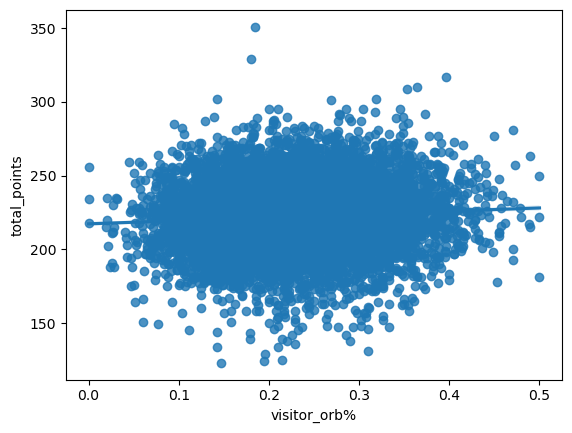

In [20]:
sns.regplot(data=df, x='visitor_orb%', y='total_points')

<Axes: xlabel='visitor_drb%', ylabel='total_points'>

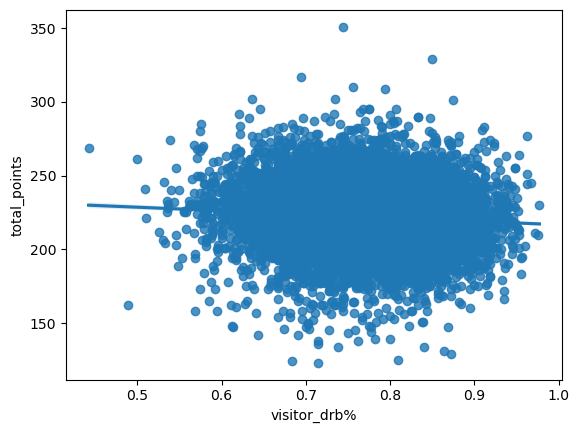

In [21]:
sns.regplot(data=df, x='visitor_drb%', y='total_points')


<Axes: xlabel='visitor_to%', ylabel='total_points'>

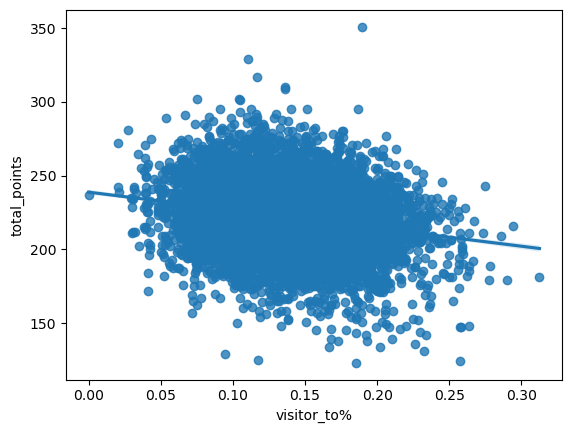

In [22]:
sns.regplot(data=df, x='visitor_to%', y='total_points')

<Axes: xlabel='visitor_efg%', ylabel='total_points'>

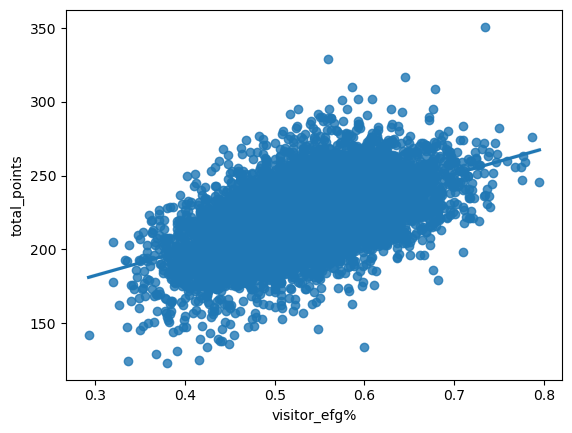

In [23]:
sns.regplot(data=df, x='visitor_efg%', y='total_points')

<Axes: xlabel='visitor_fgm', ylabel='total_points'>

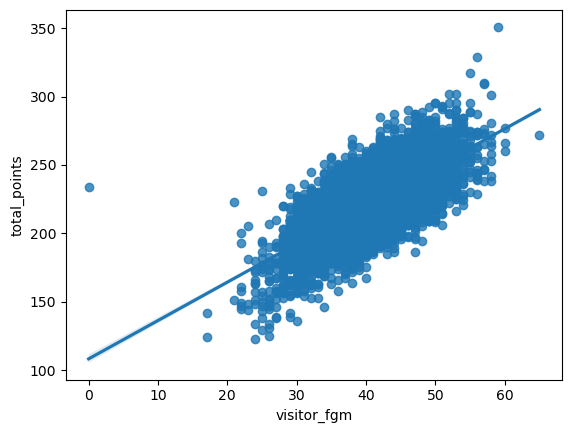

In [24]:
sns.regplot(data=df, x='visitor_fgm', y='total_points')


<Axes: xlabel='visitor_tpp', ylabel='total_points'>

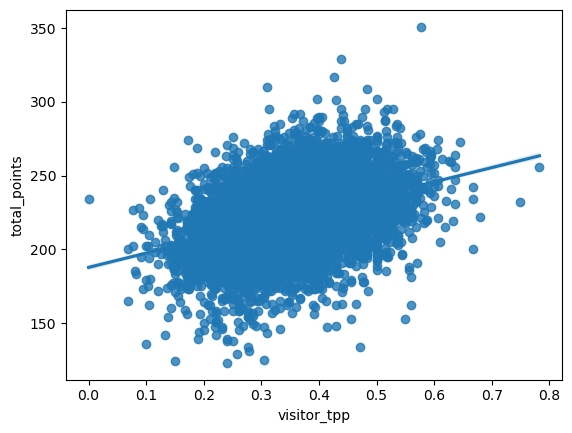

In [25]:
sns.regplot(data=df, x='visitor_tpp', y='total_points')


# Total Points Target

In [26]:
# Look for correlation between columns and 'total_points' column
correlations = df.corr(numeric_only=True)['total_points'].sort_values(ascending=False)
correlations

total_points               1.000000
visitor_points             0.830197
home_points                0.822606
visitor_fgm                0.703014
home_fgm                   0.684262
home_DRtg                  0.625993
visitor_ORtg               0.617352
visitor_DRtg               0.612106
home_ORtg                  0.600117
visitor_ts%                0.556274
home_ts%                   0.543332
visitor_efg%               0.531494
home_possessions           0.524026
visitor_possessions        0.518350
home_efg%                  0.516202
visitor_fgp                0.513515
visitor_assists            0.482219
home_assists               0.466150
visitor_tpm                0.409295
visitor_fga                0.391843
home_tpm                   0.386971
home_fga                   0.381769
visitor_tpp                0.380300
home_tpp                   0.361001
visitor_ftm                0.299734
home_ftm                   0.293876
home_fgp                   0.278931
visitor_fta                0

In [27]:
# Set target column
target_column = 'total_points'

# Look for correlation between columns and 'total_points' column
correlations = df.corr(numeric_only=True)[target_column]

# Set conditions to find feature columns
feature_columns = correlations[correlations > -0.5]

# Create new data frame with chosen feature columns
total_df = df[feature_columns.index]

# Add 'visitor_team' and 'home_team' to the new DataFrame
total_df = pd.concat([df[['home_team', 'visitor_team']], total_df], axis=1)
total_df

,home_team,visitor_team,visitor_points,visitor_fgm,visitor_fga,visitor_fgp,visitor_ftm,visitor_fta,visitor_ftp,visitor_tpm,...,visitor_DRtg,home_DRtg,visitor_turn_over_ratio,home_turn_over_ratio,visitor_efg%,home_efg%,visitor_ts%,home_ts%,home_win,total_points
0,Houston Rockets,Los Angeles Lakers,142.0,53.0,105.0,0.505,26.0,37.0,0.703,10.0,...,123.046225,119.167506,8.419533,6.741848,0.552381,0.547170,0.585422,0.600844,1,290.0
1,Sacramento Kings,Memphis Grizzlies,114.0,41.0,76.0,0.539,18.0,24.0,0.750,14.0,...,99.420050,112.871287,12.845215,12.030075,0.631579,0.482558,0.658503,0.494845,0,210.0
2,LA Clippers,Charlotte Hornets,98.0,36.0,93.0,0.387,15.0,19.0,0.789,11.0,...,102.554180,100.122599,12.026033,12.511730,0.446237,0.539474,0.483425,0.603095,1,204.0
3,Oklahoma City Thunder,Dallas Mavericks,116.0,46.0,89.0,0.517,9.0,14.0,0.643,15.0,...,120.008496,117.029863,5.461923,8.585701,0.601124,0.539326,0.609500,0.570016,0,229.0
4,Phoenix Suns,Philadelphia 76ers,123.0,43.0,77.0,0.558,27.0,34.0,0.794,10.0,...,107.885445,114.996260,15.332944,11.682243,0.623377,0.477273,0.668769,0.534188,0,233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9507,New Orleans Pelicans,Miami Heat,119.0,44.0,83.0,0.530,17.0,21.0,0.810,14.0,...,107.741421,124.372910,9.336398,8.752387,0.614458,0.556250,0.645056,0.602141,0,227.0
9508,Brooklyn Nets,Toronto Raptors,130.0,52.0,88.0,0.591,10.0,13.0,0.769,16.0,...,116.832093,124.045802,7.816941,9.572901,0.681818,0.545977,0.693555,0.589770,0,243.0
9509,Dallas Mavericks,Houston Rockets,110.0,42.0,89.0,0.472,18.0,23.0,0.783,8.0,...,90.725806,114.535610,10.842627,16.523463,0.516854,0.606667,0.554883,0.603364,0,209.0
9510,Atlanta Hawks,Denver Nuggets,139.0,53.0,94.0,0.564,21.0,21.0,1.000,12.0,...,106.913756,124.955052,8.112831,8.903587,0.627660,0.530000,0.673189,0.549249,0,259.0


# Winner Target

In [28]:
# Look for correlation between columns and 'home_win' column
correlations = df.corr(numeric_only=True)['home_win'].sort_values(ascending=False)
correlations

home_win                   1.000000
home_ORtg                  0.514509
visitor_DRtg               0.478919
home_ts%                   0.471777
home_efg%                  0.455077
home_points                0.440457
home_fgm                   0.370712
home_defReb                0.366987
home_tpp                   0.360582
home_totReb                0.289981
home_assists               0.278427
home_tpm                   0.250296
home_blocks                0.152786
home_drb%                  0.141344
home_ftm                   0.123845
home_steals                0.122142
home_orb%                  0.118527
visitor_turn_over_ratio    0.116896
home_ftp                   0.108796
home_fta_rate              0.090256
home_fta                   0.089635
visitor_to%                0.077401
visitor_turnovers          0.076524
visitor_pFouls             0.072228
visitor_possessions        0.017632
visitor_fga                0.013590
visitor_offReb             0.000975
total_points              -0

In [29]:
# Set target column
target_column = 'home_win'

# Look for correlation between columns and 'total_points' column
correlations = df.corr(numeric_only=True)[target_column]

# Set conditions to find feature columns
feature_columns = correlations[(correlations >= -0.5)]

# Create new data frame with chosen feature columns
winner_df = df[feature_columns.index]

# Add 'visitor_team' and 'home_team' to the new DataFrame
winner_df = pd.concat([df[['home_team', 'visitor_team']], winner_df], axis=1)
winner_df

,home_team,visitor_team,visitor_points,visitor_fgm,visitor_fga,visitor_fgp,visitor_ftm,visitor_fta,visitor_ftp,visitor_tpm,...,visitor_DRtg,home_DRtg,visitor_turn_over_ratio,home_turn_over_ratio,visitor_efg%,home_efg%,visitor_ts%,home_ts%,home_win,total_points
0,Houston Rockets,Los Angeles Lakers,142.0,53.0,105.0,0.505,26.0,37.0,0.703,10.0,...,123.046225,119.167506,8.419533,6.741848,0.552381,0.547170,0.585422,0.600844,1,290.0
1,Sacramento Kings,Memphis Grizzlies,114.0,41.0,76.0,0.539,18.0,24.0,0.750,14.0,...,99.420050,112.871287,12.845215,12.030075,0.631579,0.482558,0.658503,0.494845,0,210.0
2,LA Clippers,Charlotte Hornets,98.0,36.0,93.0,0.387,15.0,19.0,0.789,11.0,...,102.554180,100.122599,12.026033,12.511730,0.446237,0.539474,0.483425,0.603095,1,204.0
3,Oklahoma City Thunder,Dallas Mavericks,116.0,46.0,89.0,0.517,9.0,14.0,0.643,15.0,...,120.008496,117.029863,5.461923,8.585701,0.601124,0.539326,0.609500,0.570016,0,229.0
4,Phoenix Suns,Philadelphia 76ers,123.0,43.0,77.0,0.558,27.0,34.0,0.794,10.0,...,107.885445,114.996260,15.332944,11.682243,0.623377,0.477273,0.668769,0.534188,0,233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9507,New Orleans Pelicans,Miami Heat,119.0,44.0,83.0,0.530,17.0,21.0,0.810,14.0,...,107.741421,124.372910,9.336398,8.752387,0.614458,0.556250,0.645056,0.602141,0,227.0
9508,Brooklyn Nets,Toronto Raptors,130.0,52.0,88.0,0.591,10.0,13.0,0.769,16.0,...,116.832093,124.045802,7.816941,9.572901,0.681818,0.545977,0.693555,0.589770,0,243.0
9509,Dallas Mavericks,Houston Rockets,110.0,42.0,89.0,0.472,18.0,23.0,0.783,8.0,...,90.725806,114.535610,10.842627,16.523463,0.516854,0.606667,0.554883,0.603364,0,209.0
9510,Atlanta Hawks,Denver Nuggets,139.0,53.0,94.0,0.564,21.0,21.0,1.000,12.0,...,106.913756,124.955052,8.112831,8.903587,0.627660,0.530000,0.673189,0.549249,0,259.0


In [30]:
# Export both Dataframes for model 3 
total_df.to_csv('./data/totalPredict_ML3.csv', index=False)
winner_df.to_csv('./data/winPredict_ML3.csv', index=False)